<a href="https://colab.research.google.com/github/AkhilaGuptaP/Capstone/blob/main/6thDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### **Loading Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets_2/Airbnb NYC 2019.csv')
df.head().T


,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
#Displaying the shape of dataset
print(f'Original dataset has {df.shape} Row & Columns.')

Original dataset has (48895, 16) Row & Columns.


In [ ]:
#Statistics summary of numerical columns
df.describe(include='number')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From above statistics we understood that minimum price is Zero, hence understaing count of zero price rows and handling it

In [ ]:
#displaying rows with zero price
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [ ]:
#dropping the rows with price=0
df=df[df['price']!=0]

In [ ]:
#summary of null values
df.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Displaying the shape of the dataset

print(f'Original dataset has {df.shape} Row & Columns.')

Original dataset has (48884, 16) Row & Columns.


### **Data Cleaning**

Dropping Duplicate rows

In [ ]:
df.drop_duplicates(inplace=True)

Handling Null Values

In [ ]:
#Filling null values of both columns- reviews_per_month and last_review with 0
df['reviews_per_month'].fillna(0,inplace=True)
df['last_review'].fillna(0,inplace=True)

#Filling missing values of columns name, host_name as Unknown
columns_to_fill = ['name', 'host_name']
df[columns_to_fill]=df[columns_to_fill].fillna('Unknown')


Renaming columns appropriately

In [ ]:
df.rename(columns={'id':'Listing_id','name':'Listing_name'},inplace=True)

Summary of null values after data cleaning

In [ ]:
df.isna().sum()

Listing_id                        0
Listing_name                      0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

DataFrame after cleaning

In [ ]:
df.head(20)

,Listing_id,Listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:

df.head().T

,0,1,2,3,4
Listing_id,2539,2595,3647,3831,5022
Listing_name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


# **Popular neighbourhod based on reviews**

In [ ]:
#Grouping by neighbourhood_group and finidng total number of reviews per each neighbourhood group
reviews_grp=df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
reviews_grp


,neighbourhood_group,number_of_reviews
0,Bronx,28316
1,Brooklyn,486252
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


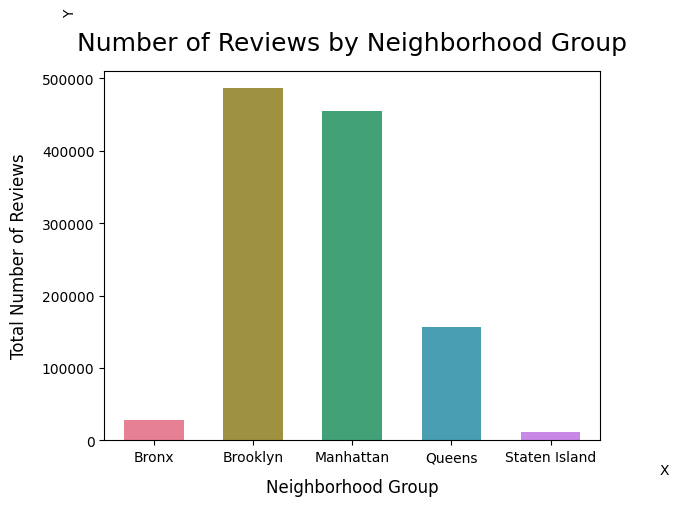

In [ ]:
#Creating subplot
fig,ax=plt.subplots()

#Creating a barplot
sns.barplot(data=reviews_grp,x='neighbourhood_group',y='number_of_reviews',palette='husl',width=0.6)


#Adding labels and title to the plot
ax.set_xlabel('Neighborhood Group',fontsize=12,labelpad=10)
ax.set_ylabel("Total Number of Reviews",fontsize=12,labelpad=10)
ax.set_title('Number of Reviews by Neighborhood Group',fontsize=18,pad=15)

#Customizing the text size and alignmnet
fig.text(1,0.04,'X',ha='center')
fig.text(0.06,1,'Y',va='center',rotation='vertical')

#Show the plot
plt.show()

________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

#**Availability_365 across different neighbourhood group with respect to room type**

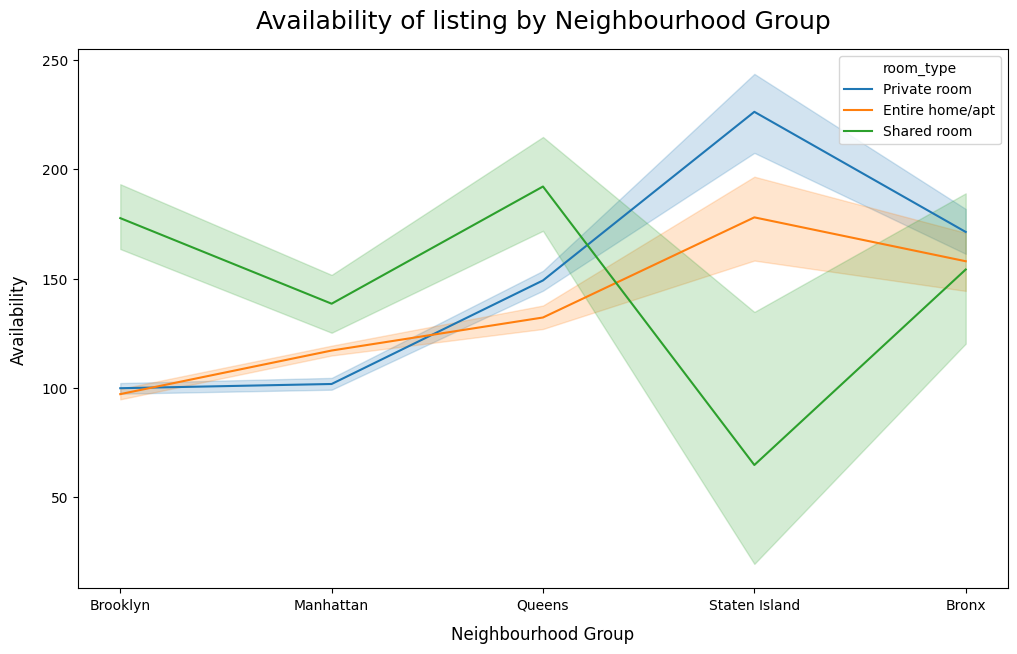

In [ ]:
#Increasing figure size
plt.figure(figsize=(12,7))

#Creating lineplot
sns.lineplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type')

#Adding labels and title to the plot
plt.xlabel('Neighbourhood Group',fontsize=12,labelpad=10)
plt.ylabel("Availability",fontsize=12,labelpad=10)
plt.title('Availability of listing by Neighbourhood Group',fontsize=18,pad=15)

#Show the plot
plt.show()

________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

# **Room Type Proportion**

In [ ]:
#Finding each room type count in the dataset
room_type=df['room_type'].value_counts()
room_type

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

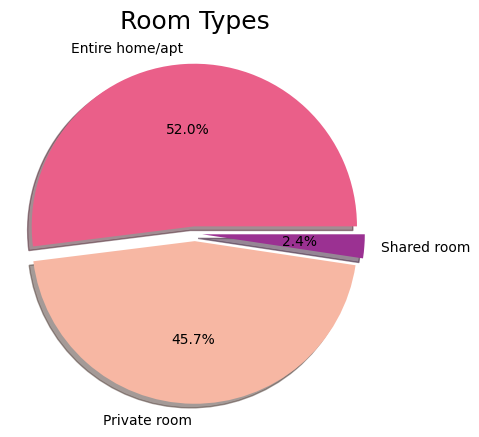

In [ ]:
#Creating pieplot for room types with explode with custom colors
explode_range = [0.05, 0.05, 0.05]
my_colors=['#EA5F89','#F7B7A3','#9B3192']
plt.pie(room_type.values,labels=room_type.index,explode=explode_range,autopct='%1.1f%%',shadow=True,colors=my_colors,radius=1.1)

#Addding the title to plot
plt.title('Room Types',fontsize=18,pad=15)

#Show plot
plt.show()


________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

# **Pricing of each neighbourhood group per each Room type**

In [ ]:
#Grouping dataset by columns neigbourhood group , room type and finiding the average price per each neighbourhood group and respective room type
pricing_by_neighbourhood=df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
pricing_by_neighbourhood


,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.890937
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.346202
4,Brooklyn,Private room,76.545428
5,Brooklyn,Shared room,50.773723
6,Manhattan,Entire home/apt,249.257994
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


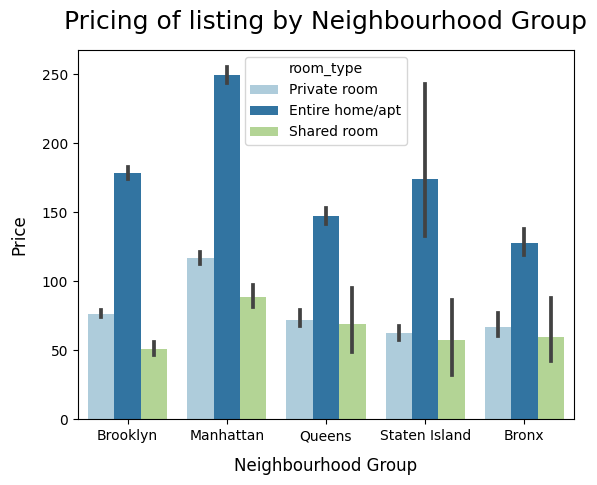

In [ ]:
#Creating barplot
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type',palette='Paired')


#Adding labels and title to the plot
plt.xlabel('Neighbourhood Group',fontsize=12,labelpad=10)
plt.ylabel("Price",fontsize=12,labelpad=10)
plt.title('Pricing of listing by Neighbourhood Group',fontsize=18,pad=15)

#Show the plot
plt.show()


________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

# **Latitude and Longitude mapping**

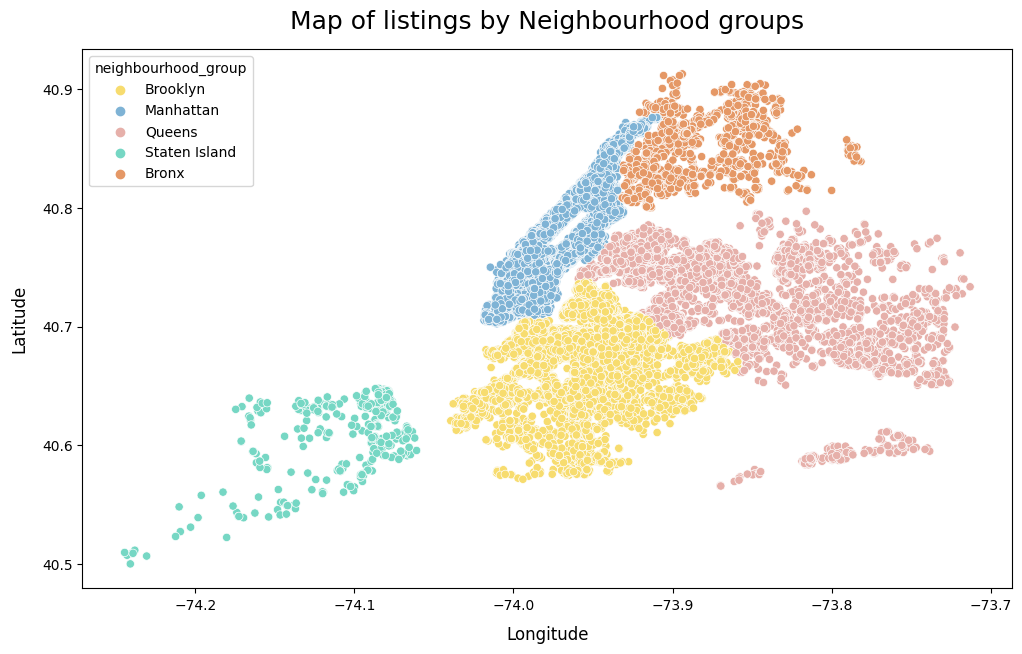

In [ ]:
#Increasing figure size and adding custom color list
plt.figure(figsize=(12,7))
my_colors=['#F7DC6F','#7FB3D5','#E6B0AA','#76D7C4','#E59866']

#Creating scatterplot using latitude and longitude with hue as neighbourhood group
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood_group',palette=my_colors)

#Adding labels and title to the plot
plt.xlabel('Longitude',fontsize=12,labelpad=10)
plt.ylabel("Latitude",fontsize=12,labelpad=10)
plt.title('Map of listings by Neighbourhood groups',fontsize=18,pad=15)

#Show the plot
plt.show()

insert map picture here

### **Lattitude and Longitude mapping with respect to availability of each neighbourhood_group**

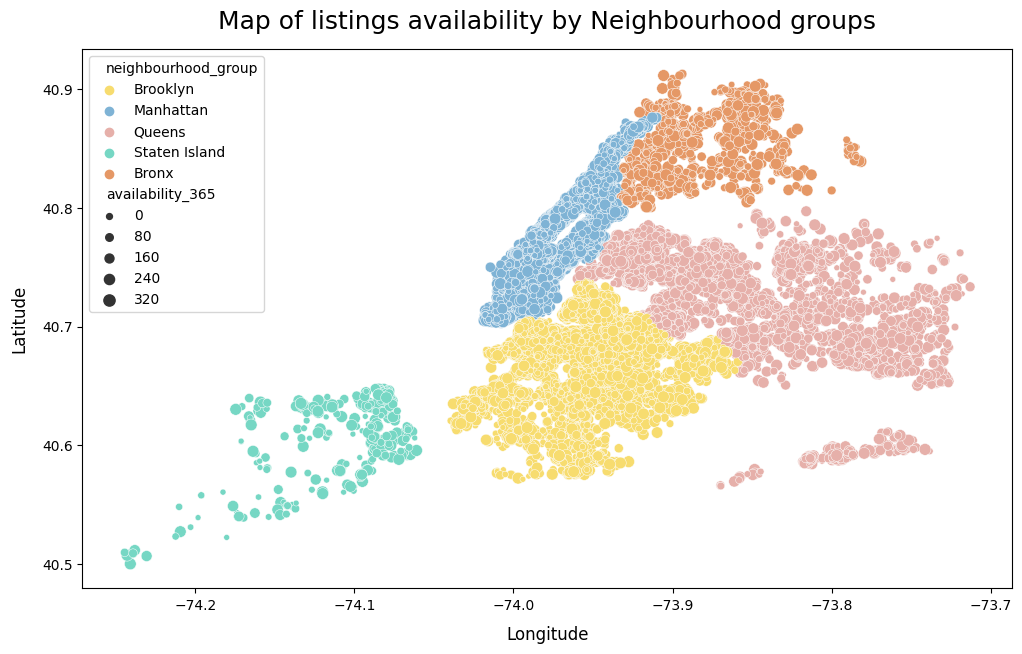

In [ ]:
# Adjusting or increasing the figure size
plt.figure(figsize=(12,7))

# Adding custom list for colors of the plot
my_colors=['#F7DC6F','#7FB3D5','#E6B0AA','#76D7C4','#E59866']

#Creating scatterplot using latitude and longitude with hue as neighbourhood group with additional parameter size which represents availability_365
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood_group',palette=my_colors,size='availability_365')

#Adding labels and title to the plot
plt.xlabel('Longitude',fontsize=12,labelpad=10)
plt.ylabel("Latitude",fontsize=12,labelpad=10)
plt.title('Map of listings availability by Neighbourhood groups',fontsize=18,pad=15)

#Show the plot
plt.show()




________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

### **Coorelation between min nyts, no of reviews,price and availability 365**

In [ ]:
df_nyts=df[['minimum_nights','number_of_reviews','price','availability_365']]

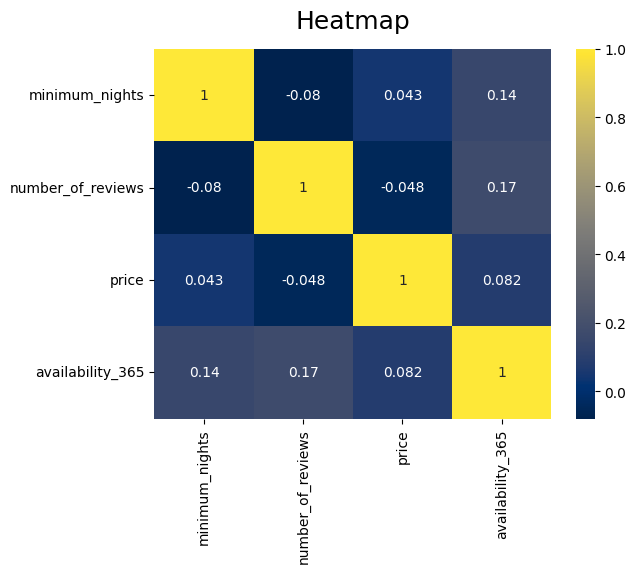

In [ ]:
#Creating a heatmap with minimum_nights, number_reviews, price, availablity_365 to see coorealtion between them
sns.heatmap(data=df_nyts.corr(),annot=True,cmap='cividis')

#Adding title to the plot
plt.title('Heatmap',fontsize=18,pad=15)

#Show plot
plt.show()


________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

# **Top hosts per each room type**

In [ ]:
#Creating seperate dataframe for each room type
roomtype_1=df.groupby('room_type').get_group('Private room')
roomtype_2=df.groupby('room_type').get_group('Entire home/apt')
roomtype_3=df.groupby('room_type').get_group('Shared room')

In [ ]:
#Finding top 5 hosts of Room type1 - Private room based on number of reviews
hosts_roomtype_1=roomtype_1.groupby('host_name')['number_of_reviews'].sum().reset_index()
top_hosts_roomtype_1=hosts_roomtype_1.sort_values('number_of_reviews',ascending=False).head()
top_hosts_roomtype_1

,host_name,number_of_reviews
4200,Michael,4372
2965,John,4030
1396,David,3552
4113,Maya,2880
3305,Kevin,2834


In [ ]:
#Finding top hosts of Room type 2- Entire home/apt based on total number of reviews
hosts_roomtype_2=roomtype_2.groupby('host_name')['number_of_reviews'].sum().reset_index()
top_hosts_roomtype_2=hosts_roomtype_2.sort_values('number_of_reviews',ascending=False).head()
top_hosts_roomtype_2

,host_name,number_of_reviews
4584,Michael,6598
1557,David,4542
2966,Jason,3841
210,Alex,3586
2006,Eric,3304


In [ ]:
#Finding top hosts of Room type 3- Shared room based on total number of reviews
hosts_roomtype_3=roomtype_3.groupby('host_name')['number_of_reviews'].sum().reset_index()
top_hosts_roomtype_3=hosts_roomtype_3.sort_values('number_of_reviews',ascending=False).head()
top_hosts_roomtype_3

,host_name,number_of_reviews
422,Nora,528
333,Lloyd,454
453,R.Henry,368
188,Gúney,349
3,Abraham,344


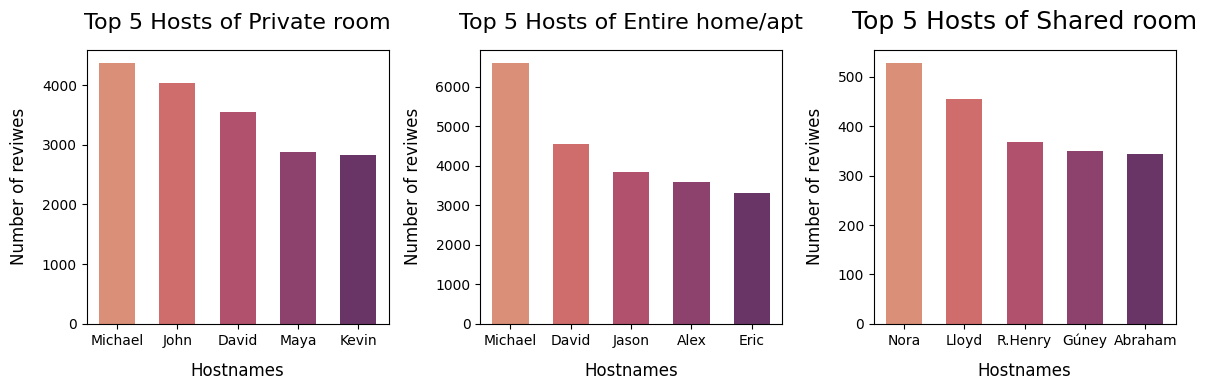

In [ ]:
# Create three separate plots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1
sns.barplot(data=top_hosts_roomtype_1,x='host_name',y='number_of_reviews',ax=axes[0],palette='flare',width=0.6)

#Adding labels and titles to plot1
axes[0].set_xlabel("Hostnames",fontsize=12,labelpad=10)
axes[0].set_ylabel("Number of reviwes",fontsize=12,labelpad=10)
axes[0].set_title('Top 5 Hosts of Private room',fontsize=16,pad=15)

# Plot 2
sns.barplot(data=top_hosts_roomtype_2,x='host_name',y='number_of_reviews',ax=axes[1],palette='flare',width=0.6)

#Adding labels and titles to plot1
axes[1].set_xlabel("Hostnames",fontsize=12,labelpad=10)
axes[1].set_ylabel("Number of reviwes",fontsize=12,labelpad=10)
axes[1].set_title('Top 5 Hosts of Entire home/apt',fontsize=16,pad=15)

# Plot 3
sns.barplot(data=top_hosts_roomtype_3,x='host_name',y='number_of_reviews',ax=axes[2],palette='flare',width=0.6)


#Adding labels and titles to plot1
axes[2].set_xlabel("Hostnames",fontsize=12,labelpad=10)
axes[2].set_ylabel("Number of reviwes",fontsize=12,labelpad=10)
axes[2].set_title('Top 5 Hosts of Shared room',fontsize=18,pad=15)

# Adjust spacing between plots
plt.tight_layout()

# Display the plots
plt.show()